In [406]:
import urllib.request
import json

count = 100
owner_id = -25232578
token = 'c2bff29ec2bff29ec2bff29e68c2d6303acc2bfc2bff29e9e17800d29762b8017da70c3'
posts_num = []
texts = []
dates = []

for i in range(0, 200, 100):
    request = 'https://api.vk.com/method/wall.get?owner_id=%d&offset=%d&count=%d&v=5.92&access_token=%s' % (owner_id, i, count, token)
    req = urllib.request.Request(request) 
    response = urllib.request.urlopen(req).read().decode('utf-8')
    data = json.loads(response)
    for j in range(len(data['response']['items'])):
        posts_num.append(data['response']['items'][j]['id'])
        texts.append(data['response']['items'][j]['text'])
        dates.append(data['response']['items'][j]['date'])
        
print(posts_num[:50])

[6695748, 6695592, 6695409, 6695079, 6694661, 6694537, 6693926, 6693841, 6693676, 6693565, 6693538, 6693337, 6693280, 6693210, 6693114, 6692993, 6692911, 6692844, 6692791, 6692724, 6692666, 6692618, 6692578, 6692509, 6692443, 6692397, 6692337, 6692266, 6692220, 6692176, 6692099, 6692026, 6691972, 6691925, 6691866, 6691807, 6691754, 6691682, 6691622, 6691567, 6691501, 6691420, 6691349, 6691288, 6690991, 6690862, 6690834, 6690791, 6690745, 6690392]


In [407]:
posts = {}

for i in range(len(posts_num)):
    posts[posts_num[i]] = [texts[i], dates[i]]

In [408]:
posts

{6695748: ['Сбербанк назвал DDos-атаки, утечку данных и мошенничество, связанное с методами социальной инженерии основными трендами в области киберпреступлений. Потенциальными жертвами могут стать около 30% офисных работников',
  1556376763],
 6695592: ['Если вы предприниматель или управленец, человек не без амбиций, тот, кто претендует на статус «лидера», вы можете узнать себя в этой истории. Везде вам говорили: «Надо развиваться». Но развиваться надо не в одной, максимум двух, «вертикалях». Ведь еще вы не только профессионал, но и много кто: атлет-любитель, домашний диджей, футболист, поэт-графоман, бармен',
  1556372929],
 6695409: ['Благодатный огонь сошел в храме Гроба Господня в Иерусалиме. Собравшимся его передал патриарх Иерусалимский Феофил III',
  1556369088],
 6695079: ['Путин хотел бы обсудить с Зеленским вопрос, как закончить конфликт на юго-востоке Украины',
  1556362963],
 6694661: ['Путин заявил, что российские власти рассматривают возможность предоставлять гражданство 

In [458]:
comments = {}

for post in posts_num:
    text_comment = []
    ids = []
    for i in range(0, 500, 100):
        request = 'https://api.vk.com/method/wall.getComments?owner_id=%d&post_id=%d&offset=%d&count=%d&v=5.92&access_token=%s' % (owner_id, post, i, count, token)
        req = urllib.request.Request(request) 
        response = urllib.request.urlopen(req).read().decode('utf-8')
        data = json.loads(response)
        for j in range(len(data['response']['items'])):
            try:
                text_comment.append(data['response']['items'][j]['text'])
                ids.append(data['response']['items'][j]['from_id']) 
            except KeyError:
                continue
    comments[post] = [text_comment, ids] 

In [410]:
comments

{6695748: [['Греф - первый)',
   'Завуалированно назвал тупыми в IT',
   'Хвала другу сказочного -гере ,крупнейший банк с крупнейшими дырами в безопасности',
   'https://amp.rbc.ru/rbcnews/finances/26/02/2019/5c74f4839a7947501397823f\nГреф признал потерю миллиардов рублей из-за ... - РБК\nhttps://www.vedomosti.ru/amp/7d726df03c/finance/news/2019/02/26/795134-gref\nГреф признал потерю Сбербанком миллиардов рублей из ...',
   'сбер банк пусть у себя дома разбирается в европе\nв России то чего им не хватает? ну вернули свое и что?',
   'В it России самые мощные спецы в мире. Нам то чего бояться? Это янки боятся русских хакеров.  И переманивают как могут русских спецов, что бы не проиграть гонку it технологий 🇷🇺🇷🇺🇷🇺',
   'Рыба гниёт с головы и по течению плывёт только дохлая рыба.',
   'сотрудники сбера сами могут приторговывать данными, а потом говорить про дыры..',
   'Лол, с помощью социальной-инженерии можно практически любого сломать, какие 30%..',
   'ПО ВСЕЙ РОСИИ ВОЛНА ПРОТЕСТОВ. Б

In [459]:
import re

sym = ".,?!…:;()[]-—–_|/\"'«»*{}<>@#$%^&№0123456789"

for key, value in posts.items():
    all_words_post = []
    words = value[0].lower().strip().split()
    for word in words:
        new_word = word.strip(sym)
        if len(new_word) > 0:
            all_words_post.append(new_word)
    if len(value) < 3:
        value.append(len(all_words_post))
    else:
        value.pop(-1)
        value.append(len(all_words_post))
    com_len = 0
    for com in comments[key][0]:
        all_words_comment = []
        words = com.lower().strip().split()
        for word in words:
            new_word = word.strip(sym)
            if len(word) > 0:
                all_words_comment.append(new_word)
        com_len += len(all_words_comment)
    if len(comments[key][0]) != 0:
        result = com_len//len(comments[key][0])
        if len(comments[key]) < 3:
            comments[key].append(result)
        else:
            comments[key].pop(-1)
            comments[key].append(result)
    else:
        comments[key].append(0)

In [412]:
comments

{6695748: [['Греф - первый)',
   'Завуалированно назвал тупыми в IT',
   'Хвала другу сказочного -гере ,крупнейший банк с крупнейшими дырами в безопасности',
   'https://amp.rbc.ru/rbcnews/finances/26/02/2019/5c74f4839a7947501397823f\nГреф признал потерю миллиардов рублей из-за ... - РБК\nhttps://www.vedomosti.ru/amp/7d726df03c/finance/news/2019/02/26/795134-gref\nГреф признал потерю Сбербанком миллиардов рублей из ...',
   'сбер банк пусть у себя дома разбирается в европе\nв России то чего им не хватает? ну вернули свое и что?',
   'В it России самые мощные спецы в мире. Нам то чего бояться? Это янки боятся русских хакеров.  И переманивают как могут русских спецов, что бы не проиграть гонку it технологий 🇷🇺🇷🇺🇷🇺',
   'Рыба гниёт с головы и по течению плывёт только дохлая рыба.',
   'сотрудники сбера сами могут приторговывать данными, а потом говорить про дыры..',
   'Лол, с помощью социальной-инженерии можно практически любого сломать, какие 30%..',
   'ПО ВСЕЙ РОСИИ ВОЛНА ПРОТЕСТОВ. Б

In [413]:
posts

{6695748: ['Сбербанк назвал DDos-атаки, утечку данных и мошенничество, связанное с методами социальной инженерии основными трендами в области киберпреступлений. Потенциальными жертвами могут стать около 30% офисных работников',
  1556376763,
  24],
 6695592: ['Если вы предприниматель или управленец, человек не без амбиций, тот, кто претендует на статус «лидера», вы можете узнать себя в этой истории. Везде вам говорили: «Надо развиваться». Но развиваться надо не в одной, максимум двух, «вертикалях». Ведь еще вы не только профессионал, но и много кто: атлет-любитель, домашний диджей, футболист, поэт-графоман, бармен',
  1556372929,
  52],
 6695409: ['Благодатный огонь сошел в храме Гроба Господня в Иерусалиме. Собравшимся его передал патриарх Иерусалимский Феофил III',
  1556369088,
  16],
 6695079: ['Путин хотел бы обсудить с Зеленским вопрос, как закончить конфликт на юго-востоке Украины',
  1556362963,
  13],
 6694661: ['Путин заявил, что российские власти рассматривают возможность пр

In [414]:
x = []
y = []

for key, value in posts.items():
    x.append(value[-1])
    y.append(comments[key][-1])

In [415]:
new = {}

for i in range(len(x)):
    if x[i] not in new:
        new[x[i]] = list(str(y[i]))
    else:
        new[x[i]].append(str(y[i]))

In [416]:
for key, value in new.items():
    sum = 0
    for val in value:
        sum += int(val)
    res = sum/len(value)
    new[key] = res

In [417]:
import matplotlib.pyplot as plt
import seaborn

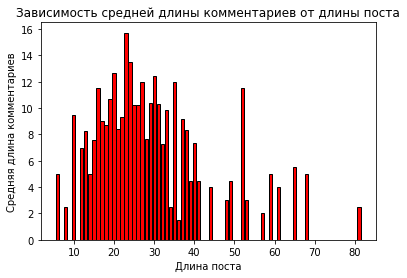

In [422]:
#plt.scatter(new.keys(),new.values(), marker='*', s=80, c='aquamarine', edgecolors='blue', linewidths=0.4)
title = 'Зависимость средней длины комментариев от длины поста'
plt.bar(new.keys(),new.values(), color='red', edgecolor='k')
plt.title(title)
plt.xlabel('Длина поста')
plt.ylabel('Средняя длина комментариев')
plt.savefig(title)

In [419]:
import time

for key,value in posts.items():
    value[1] = list(time.localtime(value[1]))

In [420]:
posts

{6695748: ['Сбербанк назвал DDos-атаки, утечку данных и мошенничество, связанное с методами социальной инженерии основными трендами в области киберпреступлений. Потенциальными жертвами могут стать около 30% офисных работников',
  [2019, 4, 27, 17, 52, 43, 5, 117, 0],
  24],
 6695592: ['Если вы предприниматель или управленец, человек не без амбиций, тот, кто претендует на статус «лидера», вы можете узнать себя в этой истории. Везде вам говорили: «Надо развиваться». Но развиваться надо не в одной, максимум двух, «вертикалях». Ведь еще вы не только профессионал, но и много кто: атлет-любитель, домашний диджей, футболист, поэт-графоман, бармен',
  [2019, 4, 27, 16, 48, 49, 5, 117, 0],
  52],
 6695409: ['Благодатный огонь сошел в храме Гроба Господня в Иерусалиме. Собравшимся его передал патриарх Иерусалимский Феофил III',
  [2019, 4, 27, 15, 44, 48, 5, 117, 0],
  16],
 6695079: ['Путин хотел бы обсудить с Зеленским вопрос, как закончить конфликт на юго-востоке Украины',
  [2019, 4, 27, 14,

In [ ]:
import os
from pymystem3 import Mystem

m = Mystem()

sym = ".,?!…:;()[]-—–_|/\"“”'«»*{}<>@#$%^&№0123456789€"

filename = 'All texts.txt'

try:
    os.remove(filename)
    f = open(filename, 'a+', encoding='utf-8')
except:
    f = open(filename, 'a+', encoding='utf-8')

try:
    os.remove('All_texts_mystem.txt')
    t = open('All_texts_mystem.txt', 'a+', encoding='utf-8')
except:
    t = open('All_texts_mystem.txt', 'a+', encoding='utf-8')    
    

for key,value in posts.items():
    f.write('Пост:\n' + value[0] + '\n')
    f.write('Комментарии:\n' + '\n'.join(comments[key][0]) + '\n')
    for line_post in value[0]:
        new_words_post = []
        words_post = line_post.lower().strip().split()
        for word in words_post:
            new_words_post.append(word.strip(sym))
        new_line = ' '.join(new_words)
        t.write(''.join(m.lemmatize(new_line)))
    for line_com in comments[key][0]:
        new_words_comment = []
        words_comment = line_com.lower().strip().split()
        for word in words_comment:
            new_words_comment.append(word.strip(sym))
        new_line = ' '.join(new_words)
        t.write(''.join(m.lemmatize(line)))

f.close()
t.close()

In [401]:
wd_vs_len = {}
hour_vs_len = {}

for value in posts.values():
    if value[1][6] not in wd_vs_len:
        wd_vs_len[value[1][6]] = []
        wd_vs_len[value[1][6]].append(str(value[-1]))
    else:
        wd_vs_len[value[1][6]].append(str(value[-1]))
    if value[1][3] not in hour_vs_len:
        hour_vs_len[value[1][3]] = []
        hour_vs_len[value[1][3]].append(str(value[-1]))
    else:
        hour_vs_len[value[1][3]].append(str(value[-1]))

In [402]:
x1 = []
y1 = []

x2 = []
y2 = []

for key, value in wd_vs_len.items():
    x1.append(key)
    y1.append(value)

for key, value in hour_vs_len.items():
    x2.append(key)
    y2.append(value)    

In [427]:
new1 = {}

for i in range(len(x1)):
    if x1[i] not in new1:
        new1[x1[i]] = y1[i]
    else:
        new1[x1[i]].append(y1[i])
        
for key, value in new1.items():
    sum = 0
    for val in value:
        sum += int(val)
    res = sum/len(value)
    new1[key] = res

In [428]:
new2 = {}

for i in range(len(x2)):
    if x2[i] not in new2:
        new2[x2[i]] = y2[i]
    else:
        new2[x2[i]].append(y2[i])
        
for key, value in new2.items():
    sum = 0
    for val in value:
        sum += int(val)
    res = sum/len(value)
    new2[key] = res

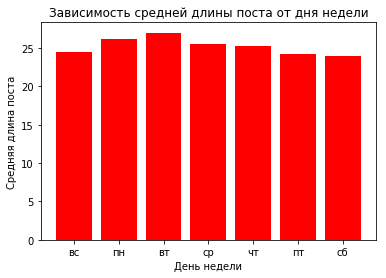

In [429]:
#plt.scatter(new1.keys(),new1.values(), marker='*', s=80, c='aquamarine', edgecolors='blue', linewidths=0.4)
title = 'Зависимость средней длины поста от дня недели'
plt.bar(new1.keys(),new1.values(), color='red')
plt.title(title)
plt.xticks([0,1,2,3,4,5,6], ['вс', 'пн', 'вт', 'ср', 'чт', 'пт', 'сб'])
plt.xlabel('День недели')
plt.ylabel('Средняя длина поста')
plt.savefig(title)

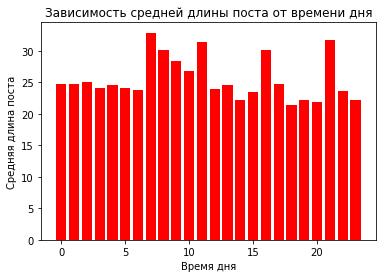

In [430]:
#plt.scatter(new2.keys(),new2.values(), marker='*', s=80, c='aquamarine', edgecolors='blue', linewidths=0.4)
title = 'Зависимость средней длины поста от времени дня'
plt.bar(new2.keys(),new2.values(), color='red')
plt.title(title)
plt.xlabel('Время дня')
plt.ylabel('Средняя длина поста')
plt.savefig(title)

In [488]:
count = 0

while count < 10:
    for key, value in comments.items():
        count += 1
        print(count)
        try:
            value.pop(3)
            value.append([])
        except:
            value.append([])
        for i in range(len(value[0])):
            request = 'https://api.vk.com/method/users.get?user_ids=%s&fields=sex,city,has_photo&v=5.92&access_token=%s' % (value[1][i], token)
            req = urllib.request.Request(request) 
            response = urllib.request.urlopen(req).read().decode('utf-8')
            data = json.loads(response)
            try:
                data['response'][0]['city']['title']
                value[3].append([data['response'][0]['sex'], data['response'][0]['city']['title'], data['response'][0]['has_photo']])
            except:
                value[3].append([data['response'][0]['sex'], 'No city', data['response'][0]['has_photo']])

1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [470]:
request = 'https://api.vk.com/method/users.get?user_ids=%s&fields=sex,city,has_photo&v=5.92&access_token=%s' % (268905862, token)
req = urllib.request.Request(request) 
response = urllib.request.urlopen(req).read().decode('utf-8')
data = json.loads(response)

In [483]:
for key, value in comments.items():
    value.pop(3)

IndexError: pop index out of range

In [496]:
with open('All_texts_mystem.txt') as k:
    k.close()

In [474]:
try:
    data['response'][0]['city']['title']
    print('no')
except:
    print('yes')

yes


In [482]:
comments

{6695748: [['Греф - первый)',
   'Завуалированно назвал тупыми в IT',
   'Хвала другу сказочного -гере ,крупнейший банк с крупнейшими дырами в безопасности',
   'https://amp.rbc.ru/rbcnews/finances/26/02/2019/5c74f4839a7947501397823f\nГреф признал потерю миллиардов рублей из-за ... - РБК\nhttps://www.vedomosti.ru/amp/7d726df03c/finance/news/2019/02/26/795134-gref\nГреф признал потерю Сбербанком миллиардов рублей из ...',
   'сбер банк пусть у себя дома разбирается в европе\nв России то чего им не хватает? ну вернули свое и что?',
   'В it России самые мощные спецы в мире. Нам то чего бояться? Это янки боятся русских хакеров.  И переманивают как могут русских спецов, что бы не проиграть гонку it технологий 🇷🇺🇷🇺🇷🇺',
   'Рыба гниёт с головы и по течению плывёт только дохлая рыба.',
   'сотрудники сбера сами могут приторговывать данными, а потом говорить про дыры..',
   'Лол, с помощью социальной-инженерии можно практически любого сломать, какие 30%..',
   'ПО ВСЕЙ РОСИИ ВОЛНА ПРОТЕСТОВ. Б

In [65]:
stops = []

with open('rus_stopwords.txt', 'r', encoding='utf-8') as stop:
    for line in stop:
        stops.append(line.strip())

In [66]:
clean = [word for word in all_words if word not in stops]

In [69]:
clean[:50]

['появилось',
 'видео',
 'взрыва',
 'церкви',
 'святого',
 'антония',
 'столице',
 'шри-ланки',
 'https://www.rbc.ru/society/21/04/2019/5cbc483f9a79470c9c1e8470?utm_source=vk_rbc',
 'видео',
 'lankasri',
 'news',
 'число',
 'погибших',
 'результате',
 'взрывов',
 'шри-ланке',
 'возросло',
 '185',
 '469',
 'человек',
 'пострадали',
 'сообщает',
 'агентство',
 'xinhua',
 'власти',
 'шри-ланки',
 'ввели',
 'комендантский',
 'час',
 'начнется',
 '18:00',
 'местному',
 'времени',
 'серия',
 'взрывов',
 'произошла',
 'нескольких',
 'регионах',
 'шри-ланке',
 'утром',
 '21',
 'апреля',
 'время',
 'пасхальной',
 'службы',
 'бомбы',
 'сработали',
 'трех',
 'отелях']

In [70]:
freq = {}

for word in clean:
    if word in freq:
        freq[word] += 1
    else:
        freq[word] = 1

In [71]:
for word in sorted(freq, key = freq.get, reverse = True)[:30]:
    print(word,"\t", freq[word]) 

россии 	 134
рбк 	 94
года 	 86
сша 	 75
году 	 74
млрд 	 70
порошенко 	 64
млн 	 55
из-за 	 50
заявил 	 48
тыс 	 46
украины 	 45
более 	 45
зеленский 	 42
компании 	 41
лет 	 39
2018 	 38
апреля 	 37
россиян 	 37
суд 	 36
президента 	 35
стартап 	 35
словам 	 34
против 	 34
также 	 30
россия 	 30
власти 	 29
больше 	 29
эксперты 	 29
2019 	 28


In [72]:
from pymystem3 import Mystem


m = Mystem()
text = ' '.join(clean)
lemmas = m.lemmatize(text)

In [73]:
lemmas = (''.join(lemmas)).split()

In [74]:
freq2 = {}

for lemma in lemmas:
    if lemma in freq2:
        freq2[lemma] += 1
    else:
        freq2[lemma] = 1

In [75]:
for lemma in sorted(freq2, key = freq2.get, reverse = True)[:50]:
    print(lemma,"\t", freq2[lemma]) 

год 	 242
россия 	 183
российский 	 98
рбк 	 94
компания 	 83
президент 	 81
украина 	 75
новый 	 75
сша 	 75
зеленский 	 71
млрд 	 70
страна 	 64
заявлять 	 64
порошенко 	 64
выборы 	 60
москва 	 60
человек 	 56
млн 	 55
россиянин 	 52
суд 	 51
из-за 	 50
глава 	 48
рассказывать 	 47
правительство 	 47
много 	 47
считать 	 46
предлагать 	 46
тыс 	 46
получать 	 45
самый 	 45
власть 	 44
владимир 	 43
слово 	 43
становиться 	 43
дело 	 42
путин 	 42
апрель 	 41
два 	 41
сообщать 	 40
первый 	 39
военный 	 38
2018 	 38
данные 	 37
должный 	 37
проект 	 37
стартап 	 37
программа 	 37
эксперт 	 36
абызов 	 36
время 	 35


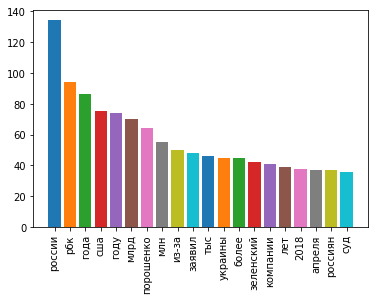

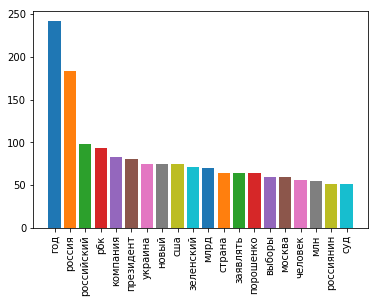

In [76]:
import matplotlib.pyplot as plt

words_plot = []
x = 1
for word in sorted(freq, key = freq.get, reverse = True)[:20]:
    words_plot.append(word)
    plt.bar(x, freq[word])
    x += 1
plt.xticks([i+1 for i in range(20)], words_plot, rotation=90)

plt.show()

lemmas_plot = []
x = 1
for lemma in sorted(freq2, key = freq2.get, reverse = True)[:20]:
    lemmas_plot.append(lemma)
    plt.bar(x, freq2[lemma])
    x += 1
plt.xticks([i+1 for i in range(20)], lemmas_plot, rotation=90)

plt.show()

In [84]:
count = 10
owner_id = -25232578
token = 'c2bff29ec2bff29ec2bff29e68c2d6303acc2bfc2bff29e9e17800d29762b8017da70c3'
posts_num = []
texts = []


request = 'https://api.vk.com/method/wall.get?owner_id=%d&count=%d&v=5.92&access_token=%s' % (owner_id, count, token)
req = urllib.request.Request(request) 
response = urllib.request.urlopen(req).read().decode('utf-8')
data = json.loads(response)

In [85]:
data

{'response': {'count': 51029,
  'items': [{'id': 6682132,
    'from_id': -25232578,
    'owner_id': -25232578,
    'date': 1556092296,
    'marked_as_ads': 0,
    'post_type': 'post',
    'text': 'Лидер КНДР Ким Чен Ын прибыл в Россию на бронепоезде. Посмотрите, как его встретили на станции Хасан в Приморском крае',
    'attachments': [{'type': 'link',
      'link': {'url': 'https://www.rbc.ru/photoreport/24/04/2019/5cc006ef9a79472131dde191?utm_source=vk_rbc',
       'title': 'Как в России встретили Ким Чен Ына. Фоторепортаж',
       'caption': 'www.rbc.ru',
       'description': 'Лидер КНДР Ким Чен Ын прибыл в Россию 24 апреля на бронепоезде. На следующий день у него запланирована встреча с Владимиром Путиным. На приграничной станции Хасан Ким Чен Ына встретили российские чиновники. Как прошла встреча — в фоторепортаже РБК',
       'photo': {'id': 456270423,
        'album_id': -25,
        'owner_id': 2000034959,
        'sizes': [{'type': 'max',
          'url': 'https://sun1-20.use

In [349]:
import time

time.localtime(1546092296)


time.struct_time(tm_year=2018, tm_mon=12, tm_mday=29, tm_hour=17, tm_min=4, tm_sec=56, tm_wday=5, tm_yday=363, tm_isdst=0)

In [104]:
text_comment = []
ids = []



request = 'https://api.vk.com/method/wall.getComments?owner_id=%d&post_id=%d&count=%d&v=5.92&access_token=%s' % (owner_id, posts_num[30], 20, token)
req = urllib.request.Request(request) 
response = urllib.request.urlopen(req).read().decode('utf-8')
data = json.loads(response)
for j in range(len(data['response']['items'])):
    try:
        text_comment.append(data['response']['items'][j]['text']) 
        ids.append(data['response']['items'][j]['from_id'])
    except KeyError:
        continue

In [105]:
len(text_comment)

13

In [106]:
len(ids)

13